# FRAUD_DETECTION

#Install Required Library 
!pip install azure-storage-blob

In [ ]:
from azure.storage.blob import BlobServiceClient
import pandas as pd
from io import StringIO

# STEP 1: Azure Connection String (copy from Azure portal)
connect_str = "DefaultEndpointsProtocol=...;AccountKey=..."

# STEP 2: Initialize Blob Service
blob_service_client = BlobServiceClient.from_connection_string(connect_str)

# STEP 3: Define container and blob (CSV) name
container_name = "rawfiles"
blob_name = "fraudTraincreditcard.csv"  # Your uploaded CSV file

# STEP 4: Access the blob and download its content
blob_client = blob_service_client.get_container_client(container_name).get_blob_client(blob_name)
blob_data = blob_client.download_blob().readall()

# STEP 5: Read the content into a pandas DataFrame
df = pd.read_csv(StringIO(blob_data.decode('utf-8')))

# Preview the data
df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
df.shape

(1296675, 23)

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [109]:
df.shape

(1296675, 23)

In [114]:
# Fraud transactions (is_fraud == 1)
fraud_df = df[df['is_fraud'] == 1]

# Non-fraud transactions (is_fraud == 0)
non_fraud_df = df[df['is_fraud'] == 0]

# Non-fraud rows ko fraud rows ke barabar random select karna
balanced_non_fraud_df = non_fraud_df.sample(n=len(fraud_df), random_state=42)

# Ab fraud aur balanced non-fraud rows ko concatenate karna
df = pd.concat([fraud_df, balanced_non_fraud_df])



In [116]:
df["is_fraud"].value_counts()

is_fraud
1    7506
0    7506
Name: count, dtype: int64

In [118]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [120]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,TX,78208,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1


In [122]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
368524,368524,2019-06-20 00:08:40,30518206766474,fraud_Rutherford-Mertz,grocery_pos,127.56,Tamara,Martinez,F,471 Marquez Prairie Suite 680,Matthews,MO,63867,36.7154,-89.6287,1019,Aeronautical engineer,1979-01-26,2449c68a46dc2a0fc5c8eb1f8c3e85ba,1340150920,36.352084,-88.920424,0
627825,627825,2019-09-23 17:52:51,4079773899158,fraud_Romaguera Ltd,health_fitness,7.67,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,1436a443b065f7f061e2a1496da34b0b,1348422771,44.270177,-116.171038,0
1049447,1049447,2020-03-10 21:50:19,581686439828,fraud_Goyette-Gerhold,kids_pets,113.59,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,1e7632c2cd31052db0bf0f8c0b7fdc28,1362952219,41.743352,-80.367570,0
9638,9638,2019-01-06 23:35:09,38544312728630,fraud_Ziemann-Waters,health_fitness,78.61,Veronica,Burton,F,08932 Bonnie Stravenue,Bonita Springs,FL,34135,26.3771,-81.7334,51427,Claims inspector/assessor,1991-08-21,8196b1cc93d59241dc2978bd163c8485,1325892909,25.439671,-80.912177,0
1095245,1095245,2020-03-31 06:04:13,4769426683924058915,fraud_Koepp-Parker,grocery_pos,123.52,Andrea,Cruz,F,26572 Hodge Villages Suite 512,Mifflin,PA,17058,40.5553,-77.4001,1909,Mining engineer,1954-08-22,28d8fee9bacf09ecf4267f253121050e,1364709853,41.071271,-76.413428,0


In [124]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15012 entries, 2449 to 1095245
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15012 non-null  int64  
 1   trans_date_trans_time  15012 non-null  object 
 2   cc_num                 15012 non-null  int64  
 3   merchant               15012 non-null  object 
 4   category               15012 non-null  object 
 5   amt                    15012 non-null  float64
 6   first                  15012 non-null  object 
 7   last                   15012 non-null  object 
 8   gender                 15012 non-null  object 
 9   street                 15012 non-null  object 
 10  city                   15012 non-null  object 
 11  state                  15012 non-null  object 
 12  zip                    15012 non-null  int64  
 13  lat                    15012 non-null  float64
 14  long                   15012 non-null  float64
 15  ci

In [128]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.501200e+04,1.501200e+04,15012.000000,15012.000000,15012.000000,15012.000000,1.501200e+04,1.501200e+04,15012.000000,15012.000000,15012.000000
mean,6.365042e+05,4.145026e+17,299.517998,48731.356248,38.620164,-90.275251,9.051075e+04,1.348818e+09,38.612480,-90.275455,0.500000
std,3.873911e+05,1.301544e+18,373.915804,27126.671123,5.128513,14.084930,3.035544e+05,1.332573e+07,5.168227,14.105491,0.500017
min,5.500000e+02,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325402e+09,19.041880,-166.550779,0.000000
25%,2.839260e+05,1.800400e+14,20.497500,25442.000000,34.778900,-96.983700,7.430000e+02,1.337471e+09,34.896843,-96.989761,0.000000
50%,6.382690e+05,3.523898e+15,89.545000,47869.000000,39.405500,-87.410100,2.526000e+03,1.348876e+09,39.403182,-87.360104,0.500000
75%,9.813065e+05,4.642255e+15,477.102500,72042.000000,42.015800,-80.128400,2.112500e+04,1.359844e+09,41.991035,-80.168734,1.000000
max,1.296552e+06,4.992346e+18,6337.250000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371813e+09,67.510267,-67.027467,1.000000


# Data cleaning

In [130]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [132]:
df.duplicated().sum()

0

In [134]:
df["trans_date_trans_time"]

2449       2019-01-02 01:06:37
2472       2019-01-02 01:47:29
2523       2019-01-02 03:05:23
2546       2019-01-02 03:38:03
2553       2019-01-02 03:55:47
                  ...         
368524     2019-06-20 00:08:40
627825     2019-09-23 17:52:51
1049447    2020-03-10 21:50:19
9638       2019-01-06 23:35:09
1095245    2020-03-31 06:04:13
Name: trans_date_trans_time, Length: 15012, dtype: object

In [136]:
# 'trans_date_trans_time' column ko datetime format me convert karna
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

# Date aur Time alag columns me extract karna
df["transaction_date"] = df["trans_date_trans_time"].dt.date  # Sirf Date
df["transaction_time"] = df["trans_date_trans_time"].dt.time  # Sirf Time



In [138]:
# Ensure transaction_date is in datetime format
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

# Extract Year, Month, and Day
df["year"] = df["transaction_date"].dt.year
df["month"] = df["transaction_date"].dt.month
df["day"] = df["transaction_date"].dt.day




In [140]:
# Convert to datetime format
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S')

# Extract hour, minute, and second
df['transaction_hour'] = df['transaction_time'].dt.hour
df['transaction_minute'] = df['transaction_time'].dt.minute
df['transaction_second'] = df['transaction_time'].dt.second

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15012 entries, 2449 to 1095245
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15012 non-null  int64         
 1   trans_date_trans_time  15012 non-null  datetime64[ns]
 2   cc_num                 15012 non-null  int64         
 3   merchant               15012 non-null  object        
 4   category               15012 non-null  object        
 5   amt                    15012 non-null  float64       
 6   first                  15012 non-null  object        
 7   last                   15012 non-null  object        
 8   gender                 15012 non-null  object        
 9   street                 15012 non-null  object        
 10  city                   15012 non-null  object        
 11  state                  15012 non-null  object        
 12  zip                    15012 non-null  int64         
 13  l

In [144]:
# Convert to datetime format
df['dob'] = pd.to_datetime(df['dob'], format='%Y-%m-%d')

# Extract Year, Month, and Day
df['dob_year'] = df['dob'].dt.year
df['dob_month'] = df['dob'].dt.month
df['dob_day'] = df['dob'].dt.day

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15012 entries, 2449 to 1095245
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15012 non-null  int64         
 1   trans_date_trans_time  15012 non-null  datetime64[ns]
 2   cc_num                 15012 non-null  int64         
 3   merchant               15012 non-null  object        
 4   category               15012 non-null  object        
 5   amt                    15012 non-null  float64       
 6   first                  15012 non-null  object        
 7   last                   15012 non-null  object        
 8   gender                 15012 non-null  object        
 9   street                 15012 non-null  object        
 10  city                   15012 non-null  object        
 11  state                  15012 non-null  object        
 12  zip                    15012 non-null  int64         
 13  l

In [23]:
# df.drop(columns=["trans_date_trans_time","transaction_date","transaction_time","dob"],inplace=True)

In [148]:

# Rename columns
df.rename(columns={
    "Unnamed: 0": "index",
    "cc_num": "credit_card_number",
    "merchant": "merchant_name",
    "category": "merchant_category",
    "amt": "transaction_amount",
    "first": "first_name",
    "last": "last_name",
    "gender": "customer_gender",
    "street": "street_address",
    "city": "customer_city",
    "state": "customer_state",
    "zip": "zipcode",
    "lat": "customer_latitude",
    "long": "customer_longitude",
    "city_pop": "city_population",
    "job": "customer_job",
    "trans_num": "transaction_id",
    "unix_time": "transaction_unix_time",
    "merch_lat": "merchant_latitude",
    "merch_long": "merchant_longitude",
    "is_fraud": "fraud_status",
    "year": "transaction_year",
    "month": "transaction_month",
    "day": "transaction_day",
    "hour": "transaction_hour",
    "minute": "transaction_minute",
    "second": "transaction_second",
    "dob_year": "date_of_birth_year",
    "dob_month": "date_of_birth_month",
    "dob_day": "date_of_birth_day"
}, inplace=True)



**Names do not impact fraud behavior – Fraudulent transactions are more influenced by patterns like transaction amount, location, and time rather than the name of the customer.**

**Remove first and last names if they don't add value to your model.**

In [150]:
df.drop(columns=["first_name","last_name"],inplace=True)

In [152]:
df.drop(columns="index",inplace=True)

In [154]:
df.drop(columns="street_address",inplace=True)

In [156]:
timestamp = 1325466397  

# Convert to datetime
converted_time = pd.to_datetime(timestamp, unit='s')

print(converted_time)

2012-01-02 01:06:37


# HANDING OUTLIER

<Axes: >

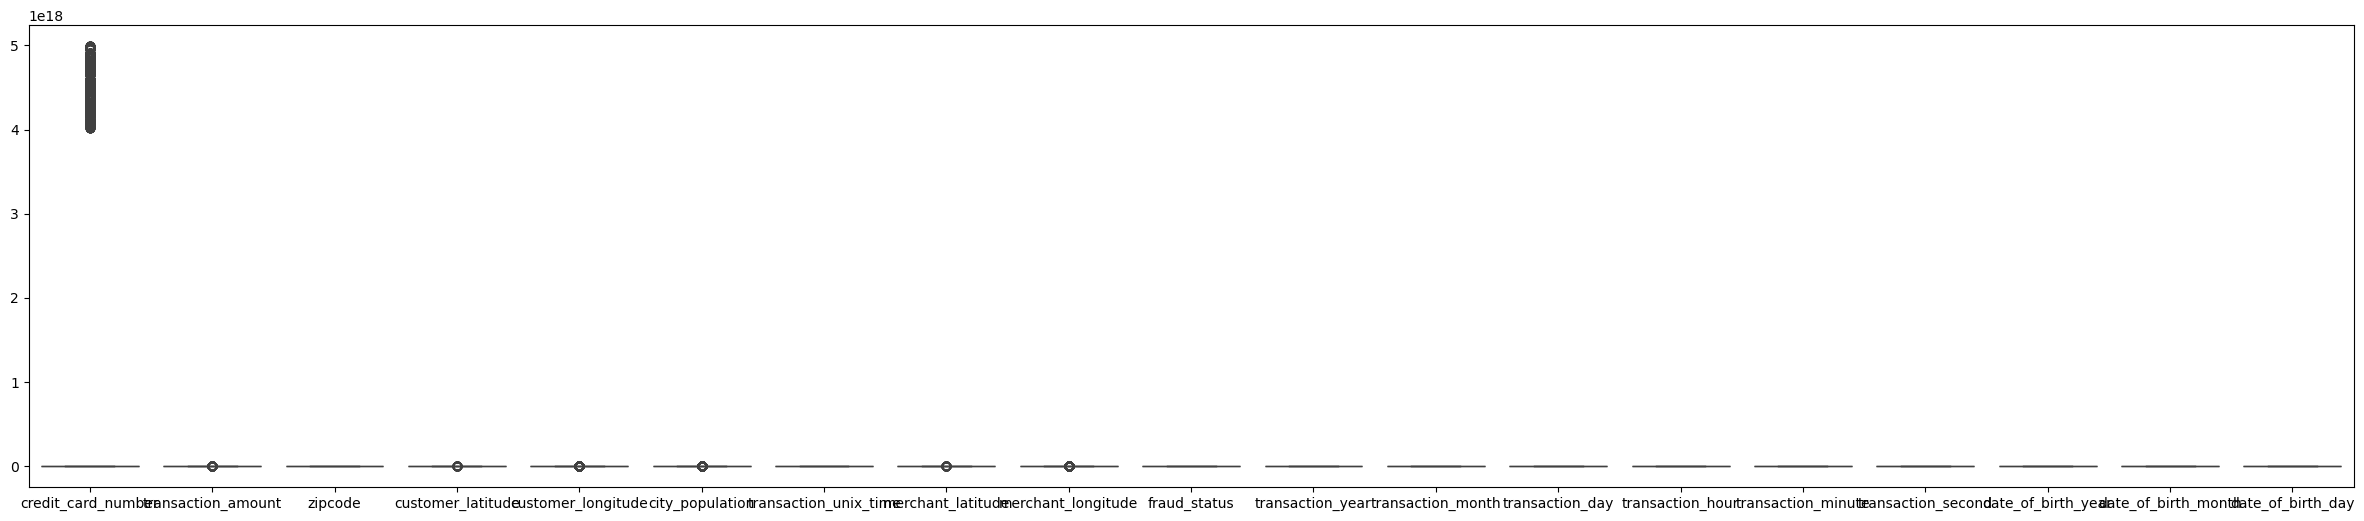

In [158]:
plt.figure(figsize=(30,6))
sns.boxplot(df)

In [162]:
df.head(1)

,trans_date_trans_time,credit_card_number,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,customer_state,zipcode,customer_latitude,customer_longitude,city_population,customer_job,dob,transaction_id,transaction_unix_time,merchant_latitude,merchant_longitude,fraud_status,transaction_date,transaction_time,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_minute,transaction_second,date_of_birth_year,date_of_birth_month,date_of_birth_day
2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,NC,28611,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1,2019-01-02,1900-01-01 01:06:37,2019,1,2,1,6,37,1988,9,15


In [164]:
df.columns

Index(['trans_date_trans_time', 'credit_card_number', 'merchant_name',
       'merchant_category', 'transaction_amount', 'customer_gender',
       'customer_city', 'customer_state', 'zipcode', 'customer_latitude',
       'customer_longitude', 'city_population', 'customer_job', 'dob',
       'transaction_id', 'transaction_unix_time', 'merchant_latitude',
       'merchant_longitude', 'fraud_status', 'transaction_date',
       'transaction_time', 'transaction_year', 'transaction_month',
       'transaction_day', 'transaction_hour', 'transaction_minute',
       'transaction_second', 'date_of_birth_year', 'date_of_birth_month',
       'date_of_birth_day'],
      dtype='object')

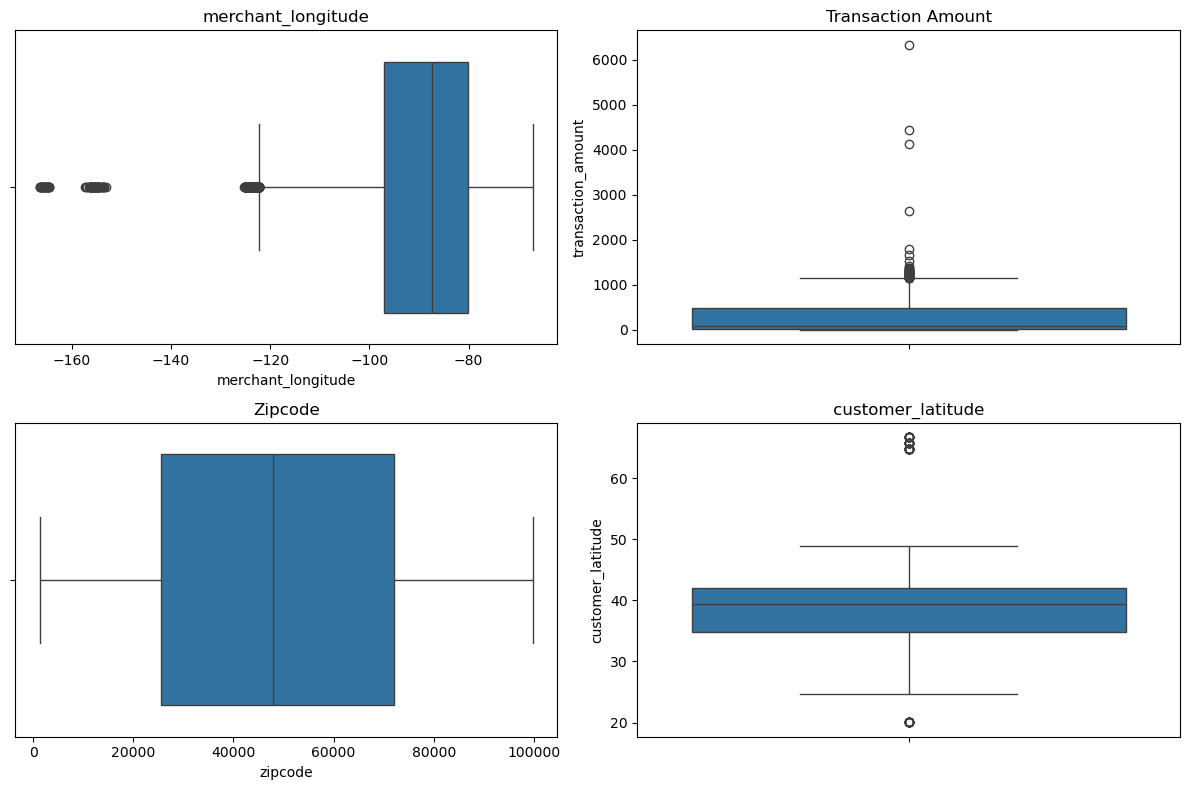

In [166]:
# Create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Create individual boxplots
sns.boxplot(data=df, x="merchant_longitude", ax=axes[0, 0])
axes[0, 0].set_title("merchant_longitude")

sns.boxplot(data=df, y="transaction_amount", ax=axes[0, 1])
axes[0, 1].set_title("Transaction Amount")

sns.boxplot(data=df, x="zipcode", ax=axes[1, 0])
axes[1, 0].set_title("Zipcode")

sns.boxplot(data=df, y="customer_latitude", ax=axes[1, 1])
axes[1, 1].set_title(" customer_latitude ")

# Adjust layout
plt.tight_layout()
plt.show()

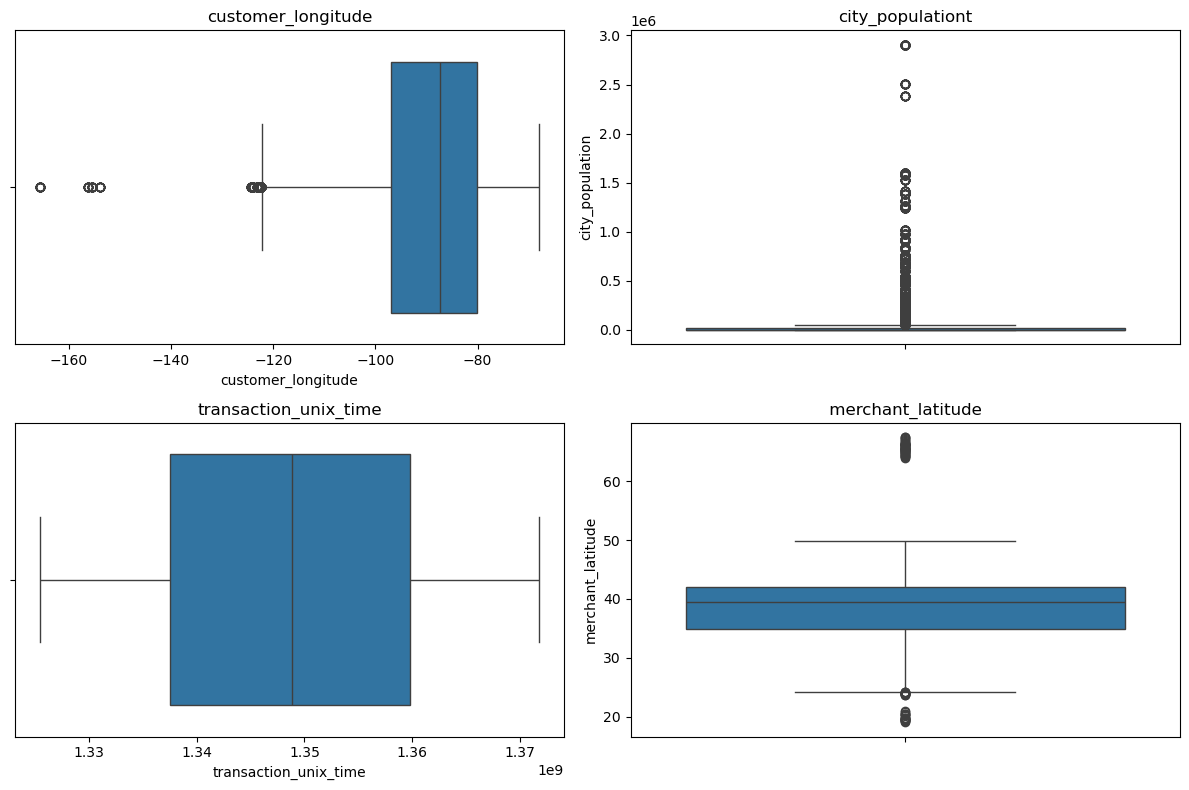

In [36]:
# Create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Create individual boxplots
sns.boxplot(data=df, x="customer_longitude", ax=axes[0, 0])
axes[0, 0].set_title("customer_longitude")

sns.boxplot(data=df, y="city_population", ax=axes[0, 1])
axes[0, 1].set_title("city_populationt")

sns.boxplot(data=df, x="transaction_unix_time", ax=axes[1, 0])
axes[1, 0].set_title("transaction_unix_time")

sns.boxplot(data=df, y="merchant_latitude", ax=axes[1, 1])
axes[1, 1].set_title(" merchant_latitude ")

# Adjust layout
plt.tight_layout()
plt.show()

In [168]:

# Columns for latitude and longitude
columns = ['merchant_latitude', 'customer_latitude', 'merchant_longitude', 'customer_longitude']

for col in columns:
    # Calculate Q1 and Q3 for each column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for capping
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the values for each column
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


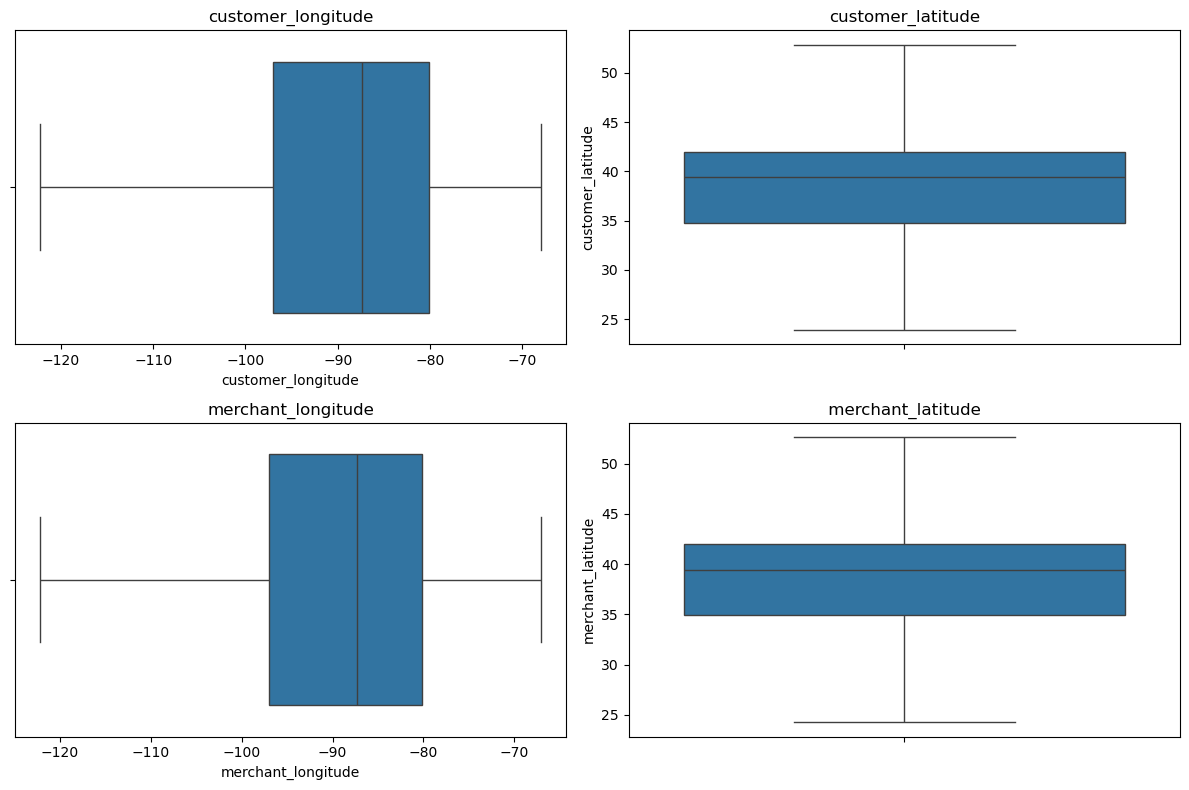

In [38]:
# Create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Create individual boxplots
sns.boxplot(data=df, x="customer_longitude", ax=axes[0, 0])
axes[0, 0].set_title("customer_longitude")

sns.boxplot(data=df, y="customer_latitude", ax=axes[0, 1])
axes[0, 1].set_title("customer_latitude")

sns.boxplot(data=df, x="merchant_longitude", ax=axes[1, 0])
axes[1, 0].set_title("merchant_longitude")

sns.boxplot(data=df, y="merchant_latitude", ax=axes[1, 1])
axes[1, 1].set_title(" merchant_latitude ")

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
state_full_names = {
    'NC': 'North Carolina', 'TX': 'Texas', 'PA': 'Pennsylvania', 'AK': 'Alaska',
    'MO': 'Missouri', 'AR': 'Arkansas', 'OH': 'Ohio', 'VA': 'Virginia', 
    'NY': 'New York', 'FL': 'Florida', 'SD': 'South Dakota', 'ME': 'Maine', 
    'NE': 'Nebraska', 'AL': 'Alabama', 'CA': 'California', 'TN': 'Tennessee', 
    'IN': 'Indiana', 'IA': 'Iowa', 'UT': 'Utah', 'SC': 'South Carolina', 
    'MI': 'Michigan', 'ND': 'North Dakota', 'KY': 'Kentucky', 'WI': 'Wisconsin', 
    'IL': 'Illinois', 'OK': 'Oklahoma', 'DC': 'District of Columbia', 'MN': 'Minnesota', 
    'LA': 'Louisiana', 'OR': 'Oregon', 'WY': 'Wyoming', 'NM': 'New Mexico', 
    'GA': 'Georgia', 'KS': 'Kansas', 'WV': 'West Virginia', 'MD': 'Maryland', 
    'NH': 'New Hampshire', 'AZ': 'Arizona', 'WA': 'Washington', 'CO': 'Colorado', 
    'NJ': 'New Jersey', 'MA': 'Massachusetts', 'DE': 'Delaware', 'ID': 'Idaho', 
    'MS': 'Mississippi', 'CT': 'Connecticut', 'MT': 'Montana', 'VT': 'Vermont', 
    'NV': 'Nevada', 'RI': 'Rhode Island', 'HI': 'Hawaii'
}

In [174]:
df['customer_state_state_full'] = df['customer_state'].map(state_full_names)

In [177]:
df['transaction_time'] = pd.to_datetime(df['transaction_time']).dt.time

In [205]:
from datetime import datetime

In [ ]:
today = datetime.today()
df['age'] = df['dob'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))

In [211]:
df.reset_index(inplace=True)

In [213]:
# df.drop(columns="trans_date_trans_time",inplace=True)
df.drop(columns="index",inplace=True)

df.drop(columns="customer_state",inplace=True)

In [223]:

# Removing 'fraud_' prefix from all values in 'merchant_name' column
df['merchant_name'] = df['merchant_name'].str.replace('fraud_', '', regex=False)

# Display updated DataFrame
print(df)


                    merchant_name merchant_category  transaction_amount  \
0                Rutherford-Mertz       grocery_pos              281.06   
1      Jenkins, Hauck and Friesen     gas_transport               11.52   
2                Goodwin-Nitzsche       grocery_pos              276.31   
3                Erdman-Kertzmann     gas_transport                7.03   
4                    Koepp-Parker       grocery_pos              275.73   
...                           ...               ...                 ...   
15007            Rutherford-Mertz       grocery_pos              127.56   
15008               Romaguera Ltd    health_fitness                7.67   
15009             Goyette-Gerhold         kids_pets              113.59   
15010              Ziemann-Waters    health_fitness               78.61   
15011                Koepp-Parker       grocery_pos              123.52   

      customer_gender   customer_city  city_population  \
0                   M   Collettsville    

In [87]:
# df.to_csv("cleaned_dataset.csv")


In [197]:
df.drop(columns=["trans_date_trans_time","credit_card_number","zipcode","dob","transaction_id","transaction_unix_time","customer_latitude","customer_longitude","transaction_unix_time","merchant_latitude","merchant_longitude"],inplace=True)

In [199]:
df.drop(columns=["transaction_date","transaction_time"],inplace=True)

In [225]:
df

,merchant_name,merchant_category,transaction_amount,customer_gender,customer_city,city_population,customer_job,fraud_status,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_minute,transaction_second,date_of_birth_year,date_of_birth_month,date_of_birth_day,customer_state_state_full,age
0,Rutherford-Mertz,grocery_pos,281.06,M,Collettsville,885,Soil scientist,1,2019,1,2,1,6,37,1988,9,15,North Carolina,36
1,"Jenkins, Hauck and Friesen",gas_transport,11.52,F,San Antonio,1595797,Horticultural consultant,1,2019,1,2,1,47,29,1960,10,28,Texas,64
2,Goodwin-Nitzsche,grocery_pos,276.31,F,San Antonio,1595797,Horticultural consultant,1,2019,1,2,3,5,23,1960,10,28,Texas,64
3,Erdman-Kertzmann,gas_transport,7.03,M,Collettsville,885,Soil scientist,1,2019,1,2,3,38,3,1988,9,15,North Carolina,36
4,Koepp-Parker,grocery_pos,275.73,F,San Antonio,1595797,Horticultural consultant,1,2019,1,2,3,55,47,1960,10,28,Texas,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,Rutherford-Mertz,grocery_pos,127.56,F,Matthews,1019,Aeronautical engineer,0,2019,6,20,0,8,40,1979,1,26,Missouri,46
15008,Romaguera Ltd,health_fitness,7.67,M,Mesa,129,Cartographer,0,2019,9,23,17,52,51,1965,12,15,Idaho,59
15009,Goyette-Gerhold,kids_pets,113.59,M,Cochranton,5507,Retail merchandiser,0,2020,3,10,21,50,19,1973,7,28,Pennsylvania,51
15010,Ziemann-Waters,health_fitness,78.61,F,Bonita Springs,51427,Claims inspector/assessor,0,2019,1,6,23,35,9,1991,8,21,Florida,33


# Final Python Code to Upload Cleaned CSV to Azure Blob

In [ ]:

from azure.storage.blob import BlobServiceClient
from io import StringIO

# Step 1: Azure Connection String (from Azure portal)
connect_str = "DefaultEndpointsProtocol=...;AccountKey=..."

# Step 2: Initialize the Blob Service Client
blob_service_client = BlobServiceClient.from_connection_string(connect_str)

# Step 3: Define container and cleaned file name
container_name = "rawfiles"
cleaned_blob_name = "credit_card_fraud_cleaned.csv"

# Step 4: Convert cleaned DataFrame to CSV in-memory
csv_buffer = StringIO()
df.to_csv(csv_buffer, index=False)

# Step 5: Upload the cleaned CSV to Azure Blob Storage
blob_client = blob_service_client.get_container_client(container_name).get_blob_client(cleaned_blob_name)
blob_client.upload_blob(csv_buffer.getvalue(), overwrite=True)



